We will clean and analyze a dataset containing life expectancy data by country and year.

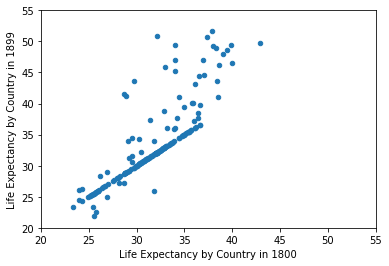

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

g1800s = pd.read_csv('g1800s.csv')

g1800s.plot(kind='scatter', x='1800', y='1899')

plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Specify axis limits
plt.xlim(20, 55)
plt.ylim(20, 55)

plt.show()

We are visually comparing life expectancy in 1800 with that in 1899.  Points above the diagonal represent countries with increased life expectancy at the end of the 19th century.

Now we create analogous visualizations for the 20th century, as well as 2000--2016.

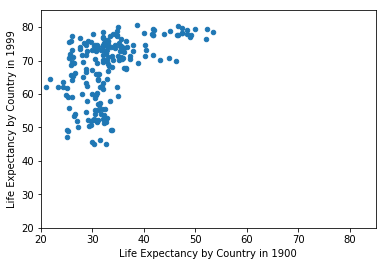

In [19]:
g1900s = pd.read_csv('g1900s.csv')

g1900s.plot(kind='scatter', x='1900', y='1999')

plt.xlabel('Life Expectancy by Country in 1900')
plt.ylabel('Life Expectancy by Country in 1999')

plt.xlim(20, 85)
plt.ylim(20, 85)

plt.show()

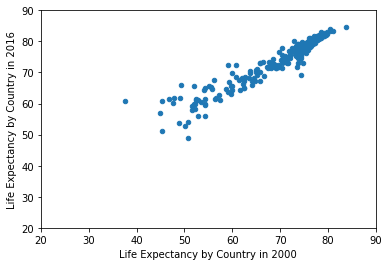

In [20]:
g2000s = pd.read_csv('g2000s.csv')

g2000s.plot(kind='scatter', x='2000', y='2016')

plt.xlabel('Life Expectancy by Country in 2000')
plt.ylabel('Life Expectancy by Country in 2016')

plt.xlim(20, 90)
plt.ylim(20, 90)

plt.show()

In [17]:
def drop_null_check_valid(row_data):
    """Function that takes a row of data,
    drops all missing values,
    and checks if all remaining values are greater than or equal to 0"""
    no_na = row_data.dropna()
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

# Confirm that the first column is 'Life expectancy'
assert g1800s.columns[0] == 'Life expectancy'

# Check whether the values are nonnegative, excepting the first column
assert g1800s.iloc[:, 1:].apply(drop_null_check_valid, axis=1).all().all()

# Check that there is only one instance of each country; sanity check
assert g1800s['Life expectancy'].value_counts()[0] == 1

In [21]:
def drop_null_check_valid(row_data):
    """Function that takes a row of data,
    drops all missing values,
    and checks if all remaining values are greater than or equal to 0"""
    no_na = row_data.dropna()
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

# Confirm that the first column is 'Life expectancy'
assert g1900s.columns[0] == 'Life expectancy'

# Check whether the values are nonnegative, excepting the first column
assert g1900s.iloc[:, 1:].apply(drop_null_check_valid, axis=1).all().all()

# Check that there is only one instance of each country; sanity check
assert g1900s['Life expectancy'].value_counts()[0] == 1

In [22]:
def drop_null_check_valid(row_data):
    """Function that takes a row of data,
    drops all missing values,
    and checks if all remaining values are greater than or equal to 0"""
    no_na = row_data.dropna()
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

# Confirm that the first column is 'Life expectancy'
assert g2000s.columns[0] == 'Life expectancy'

# Check whether the values are nonnegative, excepting the first column
assert g2000s.iloc[:, 1:].apply(drop_null_check_valid, axis=1).all().all()

# Check that there is only one instance of each country; sanity check
assert g2000s['Life expectancy'].value_counts()[0] == 1

Now to concatenate the DataFrames for the 19th, 20th, and 21st centuries.

In [24]:
# Concatenate the DataFrames row-wise!
gapminder = pd.concat([g1800s,g1900s,g2000s])

# Print the shape of gapminder, just to check
print(gapminder.shape)

print(gapminder.head())
print(gapminder.tail())

(780, 218)
    1800   1801   1802   1803   1804   1805   1806   1807   1808   1809  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1  28.21  28.20  28.19  28.18  28.17  28.16  28.15  28.14  28.13  28.12   
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3  35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40   
4  28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82   

           ...            2008  2009  2010  2011  2012  2013  2014  2015  \
0          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   2016        Life expectancy  
0   NaN               Abkhazia  
1   NaN        

Next, we 'melt' gapminder so that we have a single column called 'year'.  As a result, we have 780 x 217 = 169,260 observations.  We also relabel the columns of the melted DataFrame.

In [27]:
gapminder_melt = pd.melt(frame=gapminder,id_vars='Life expectancy')

gapminder_melt.columns = ['country', 'year', 'life_expectancy']

print(gapminder_melt.shape)
print(gapminder_melt.head())
print(gapminder_melt.tail())
print(gapminder_melt.info())

(169260, 3)
                 country  year  life_expectancy
0               Abkhazia  1800              NaN
1            Afghanistan  1800            28.21
2  Akrotiri and Dhekelia  1800              NaN
3                Albania  1800            35.40
4                Algeria  1800            28.82
            country  year  life_expectancy
169255   Yugoslavia  2016              NaN
169256       Zambia  2016            57.10
169257     Zimbabwe  2016            61.69
169258        Åland  2016              NaN
169259  South Sudan  2016            56.10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169260 entries, 0 to 169259
Data columns (total 3 columns):
country            169260 non-null object
year               169260 non-null object
life_expectancy    43857 non-null float64
dtypes: float64(1), object(2)
memory usage: 2.6+ MB
None


The datatype of 'year' should be int64, not object!  So we fix that.

In [29]:
import numpy as np

# Convert the year column to numeric
gapminder_melt.year = pd.to_numeric(gapminder_melt.year)

# Making sure
assert gapminder_melt.country.dtypes == np.object

assert gapminder_melt.year.dtypes == np.int64

assert gapminder_melt.life_expectancy.dtypes == np.float64

Checking the 'country' column for special characters, using a regular expression pattern:

In [30]:
# Create a pandas series
countries = pd.Series(gapminder_melt.country)

# Drop duplicates from countries for purposes of matching to pattern
countries = countries.drop_duplicates()

# Write the regular expression
pattern = '^[A-Za-z\.\s]*$'

# Create the Boolean vector
mask = countries.str.contains(pattern)

# Invert the Boolean
mask_inverse = ~mask

# Subset countries using mask_inverse
invalid_countries = countries.loc[mask_inverse]

print(invalid_countries)

49            Congo, Dem. Rep.
50                 Congo, Rep.
53               Cote d'Ivoire
73      Falkland Is (Malvinas)
93               Guinea-Bissau
98            Hong Kong, China
118    United Korea (former)\n
131               Macao, China
132             Macedonia, FYR
145      Micronesia, Fed. Sts.
161            Ngorno-Karabakh
187             St. Barthélemy
193     St.-Pierre-et-Miquelon
225                Timor-Leste
251      Virgin Islands (U.S.)
252       North Yemen (former)
253       South Yemen (former)
258                      Åland
Name: country, dtype: object


Is there a country named Åland?

In any case, we next deal with missing ('NaN') entries.

In [39]:
# Check whether country contains any missing values
assert pd.notnull(gapminder_melt.country).all()

# Check whether year contains any missing values
assert pd.notnull(gapminder_melt.year).all()

# Check whether life_expectancy contains any missing values
assert pd.notnull(gapminder_melt.life_expectancy).all()

AssertionError: 

In [40]:
print(gapminder_melt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169260 entries, 0 to 169259
Data columns (total 3 columns):
country            169260 non-null object
year               169260 non-null int64
life_expectancy    43857 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None


So only the life_expectancy column contains null entries.  We will be dropping any rows in which the life_expectancy entry is null.

In [41]:
# Drop the missing values
gapminder = gapminder_melt.dropna()

print(gapminder.shape)

(43857, 3)


Finally, some aggregation and more data visualization.  In particular, we will find the average life expectancy in each year, across all countries.

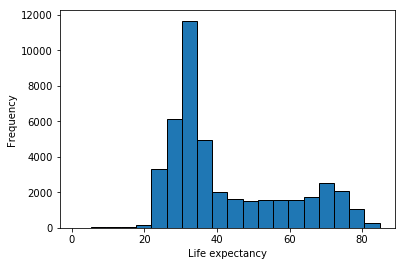

year
1800    31.486020
1801    31.448905
1802    31.463483
1803    31.377413
1804    31.446318
Name: life_expectancy, dtype: float64
year
2012    71.663077
2013    71.916106
2014    72.088125
2015    72.321010
2016    72.556635
Name: life_expectancy, dtype: float64


In [49]:
# Create a histogram of life_expectancy
gapminder.life_expectancy.plot(kind='hist', bins = 20, ec = 'black')

plt.xlabel('Life expectancy')

plt.show()

# Create gapminder_agg DataFrame recording average life expectancy in each year
gapminder_agg = gapminder.groupby('year')['life_expectancy'].mean()

print(gapminder_agg.head())
print(gapminder_agg.tail())

Out of about 44,000 observations, for a clear plurality life expectancy lies in the 30s.

Also, the head and tail of gapminder_agg are reasonable, informative, and promising.

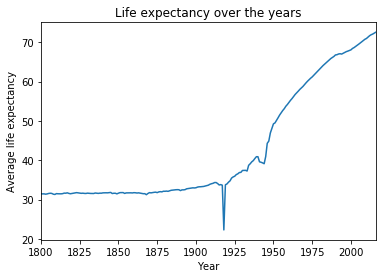

In [50]:
# Create a line plot of average life expectancy per year
gapminder_agg.plot()

plt.title('Life expectancy over the years')
plt.ylabel('Average life expectancy')
plt.xlabel('Year')

plt.show()

# Save both DataFrames to csv files
gapminder.to_csv('gapminder.csv')
gapminder_agg.to_csv('gapminder_agg.csv')

It is unclear what is behind the downward spike around the year 1920.  This would require further investigation.  Overall, there was little growth in life expectancy in the 1800s and early 1900s.  After 1920, it's a very different story!